# 4.9 Intro to Data Visualization with Python
## Creating Bar Charts
## Exporting Charts
## Creating Histograms and Scatterplots
## Creating Line Charts
## Sampling data

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
path = r'C:\Users\User\241025_Instacart Basket Analysis'

In [4]:
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'aggregated_ords_prods_merge.pkl'))

In [5]:
ords_prods_merge.dtypes

order_id                     int64
user_id                      int64
order_number                 int64
orders_day_of_the_week       int64
order_hour_of_day            int64
days_since_prior_order     float64
product_id                   int64
add_to_cart_order            int64
reordered                    int64
_merge                    category
product_name                object
aisle_id                     int64
department_id                int64
prices                     float64
Match                     category
price_range_loc             object
busiest_day                 object
busiest_days                object
busiest_period_of_day       object
max_order                    int64
loyalty_flag                object
average_spend              float64
spending_flag               object
customer_frequency         float64
frequency_flag              object
dtype: object

In [6]:
ords_prods_merge.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spending_flag,customer_frequency,frequency_flag
0,2539329,1,1,2,8,NaN,196,1,0,both,...,Mid-range product,Regularly busy,Regularly busy,Fewest orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
1,2539329,1,1,2,8,NaN,14084,2,0,both,...,Mid-range product,Regularly busy,Regularly busy,Fewest orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
2,2539329,1,1,2,8,NaN,12427,3,0,both,...,Low-range product,Regularly busy,Regularly busy,Fewest orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
3,2539329,1,1,2,8,NaN,26088,4,0,both,...,Low-range product,Regularly busy,Regularly busy,Fewest orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
4,2539329,1,1,2,8,NaN,26405,5,0,both,...,Low-range product,Regularly busy,Regularly busy,Fewest orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer


## Creating Bar Charts

<Axes: xlabel='orders_day_of_the_week'>

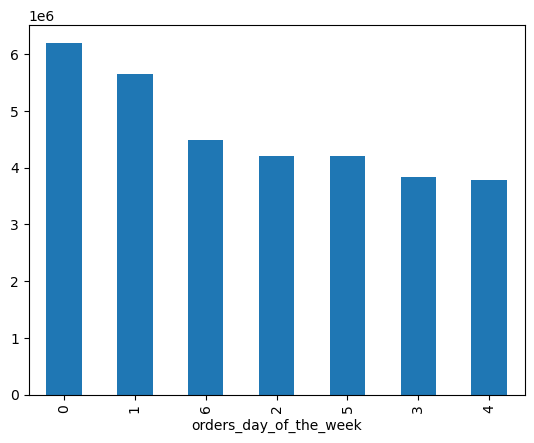

In [8]:
# create a bar chart

ords_prods_merge['orders_day_of_the_week'].value_counts().plot.bar()

([<matplotlib.axis.XTick at 0x19ece9b0b90>,
 [Text(0, 0, 'Saturday'),
  Text(1, 0, 'Sunday'),
  Text(2, 0, 'Monday'),
  Text(3, 0, 'Tuesday'),
  Text(4, 0, 'Wednesday'),
  Text(5, 0, 'Thursday'),
  Text(6, 0, 'Friday')])

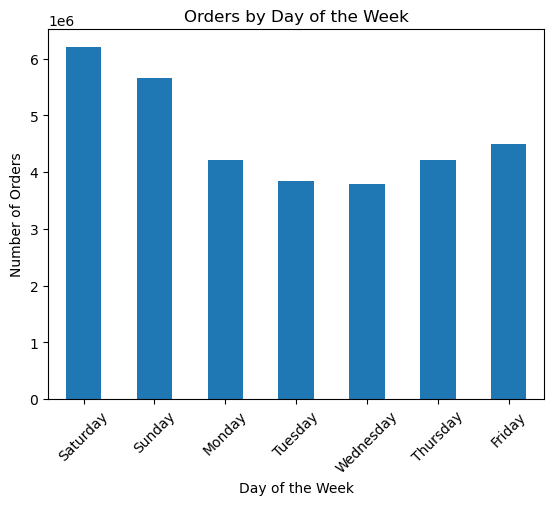

In [79]:
ords_prods_merge['orders_day_of_the_week'].value_counts().sort_index().plot.bar()

# Add title and axis labels
plt.title('Orders by Day of the Week')  # Set the title
plt.xlabel('Day of the Week')          # Label for the x-axis
plt.ylabel('Number of Orders')         # Label for the y-axis

# Set custom x-axis labels for the days of the week
day_labels = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
plt.xticks(ticks=range(len(day_labels)), labels=day_labels, rotation=45)

In [10]:
ords_prods_merge['orders_day_of_the_week'].value_counts()

orders_day_of_the_week
0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: count, dtype: int64

In [11]:
ords_prods_merge['orders_day_of_the_week'].value_counts().sort_index()

orders_day_of_the_week
0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: count, dtype: int64

## Exporting Charts

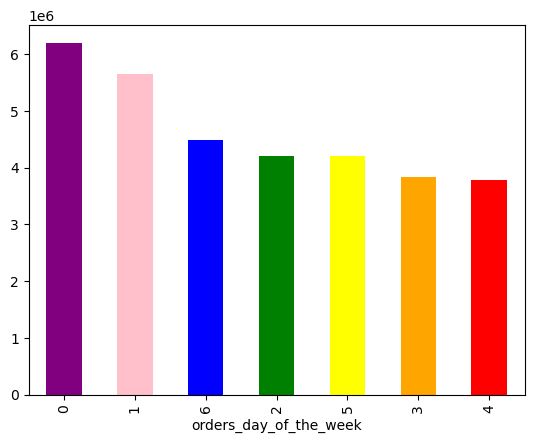

In [13]:
# assigning colors to bars and save it in Jupyter’s memory

bar = ords_prods_merge['orders_day_of_the_week'].value_counts().plot.bar(color = ['purple', 'pink', 'blue', 'green', 'yellow', 'orange', 'red'])

In [14]:
# export visualisation outside of Jupyter in the form of an image file

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

## Creating Histograms and Scatterplots

<Axes: ylabel='Frequency'>

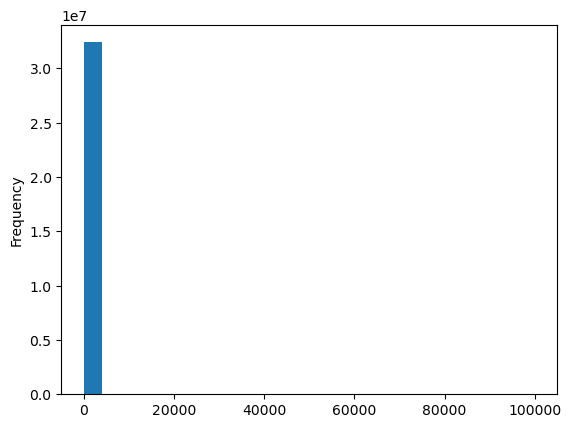

In [16]:
# creating a histogram of the “prices” column

ords_prods_merge['prices'].plot.hist(bins = 25)

In [17]:
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [18]:
ords_prods_merge['prices'].mean()

11.980225638383445

In [19]:
ords_prods_merge['prices'].median()

7.4

In [20]:
ords_prods_merge['prices'].max()

99999.0

<Axes: xlabel='prices', ylabel='prices'>

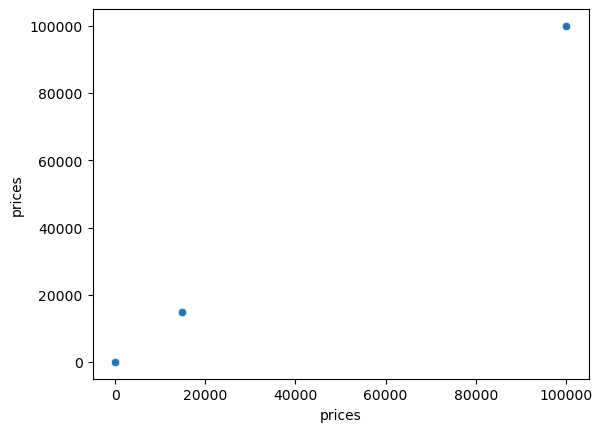

In [21]:
#  when conducting an exploratory analysis, you can also use scatterplots to visualize the distribution of data points in order to identify any outliers

sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [22]:
# there are two data points far beyond values you’d ever expect - investigate this, by running a few more exploratory checks on your data
# determine whether there are any values above a certain threshold in your data, for instance, above 100$ (imagined max price paid in a supermarket)

ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spending_flag,customer_frequency,frequency_flag
1576,912404,17,12,2,14,5.0,21553,5,0,both,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
1638,603376,17,22,6,16,4.0,21553,3,1,both,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
16522,3264360,135,2,2,21,13.0,21553,6,0,both,...,High-range product,Regularly busy,Regularly busy,Fewest orders,4,New customer,1154.792308,High spender,12.0,Regular customer
16528,892534,135,3,0,8,12.0,21553,3,1,both,...,High-range product,Busiest day,Busiest days,Fewest orders,4,New customer,1154.792308,High spender,12.0,Regular customer
53672,229704,342,8,1,19,30.0,21553,9,0,both,...,High-range product,Regularly busy,Busiest days,Fewest orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32320511,3172853,205650,18,1,9,7.0,21553,17,1,both,...,High-range product,Regularly busy,Busiest days,Most orders,25,Regular customer,351.141618,High spender,6.0,Frequent customer
32347717,2504315,205818,3,5,15,3.0,21553,13,0,both,...,High-range product,Regularly busy,Regularly busy,Most orders,25,Regular customer,170.073770,High spender,13.0,Regular customer
32347727,1108388,205818,5,4,5,1.0,21553,5,1,both,...,High-range product,Least busy,Least busy,Average orders,25,Regular customer,170.073770,High spender,13.0,Regular customer
32380527,1916142,206049,1,2,17,NaN,21553,2,0,both,...,High-range product,Regularly busy,Regularly busy,Fewest orders,5,New customer,938.031250,High spender,7.0,Frequent customer


In [23]:
# mark outliers as missing and turn them into NaNs

ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [24]:
# check result

ords_prods_merge['prices'].max()

25.0

<Axes: ylabel='Frequency'>

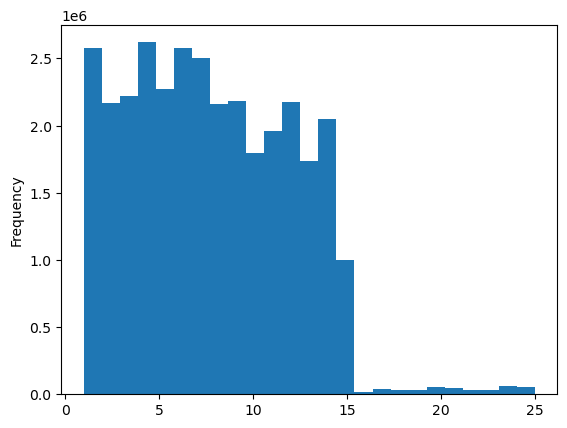

In [25]:
# creating a histogram of the “prices” column again 

ords_prods_merge['prices'].plot.hist(bins = 25)

<Axes: ylabel='Frequency'>

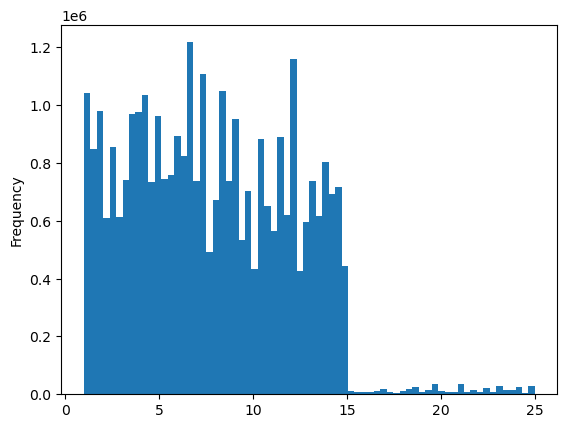

In [26]:
# To increase the level of granularity in the histogram, simply increase the number of bins to, say, 70. 
# This will result in a histogram with more, thinner columns

ords_prods_merge['prices'].plot.hist(bins = 70)

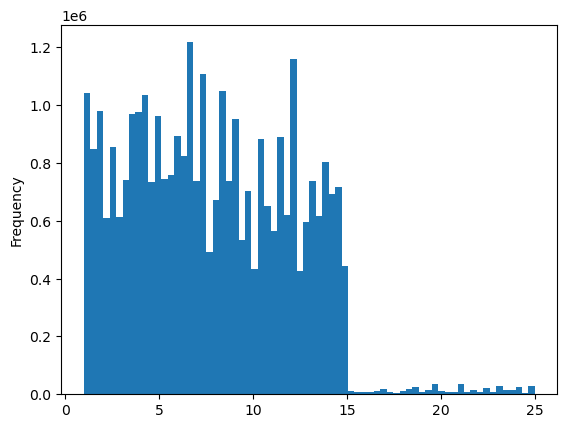

In [27]:
# saving the visualisation in Jupyter’s memory

hist = ords_prods_merge['prices'].plot.hist(bins = 70)

In [28]:
# export visualisation outside of Jupyter in the form of an image file

hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_dow.png'))

## Creating Line Charts

In [30]:
# Line charts are traditionally used to visualize the development of a characteristic over time - dates are not in the dataset
# we could test out a different type of line chart, such as the development of the “prices” column 
# for that we would need to create subset to avoid memory error due to large computation (df = ords_prods_merge[:2000000]) - is not a good idea
# it would not be representative
# sampling data is the way to go instead

## Sampling data

In [32]:
# Creating these samples requires a list of random floating numbers between 0 and 1 that’s as long as the length of the dataframe. 
# Each row in the dataframe is “assigned” one of these numbers, and then the numbers are compared to a value. 
# In this case, the value is 0.7, since you want a 70/30 split.
# Any rows whose assigned number is less than 0.7 are placed in one sample 
# Any rows whose assigned number is greater than 0.7 are placed in the other, effectively splitting the dataframe into two dataframes at a 70/30 ratio.

np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [33]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [34]:
# The entire sampling workflow:

In [35]:
# create a list holdingTrue/False values to the test np. random.rant() <= 0.7

dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [36]:
# store 70% of the sample in the dataframe big

big = ords_prods_merge[dev]

In [37]:
# store 30% of the sample in the dataframe small

small = ords_prods_merge[~dev]

In [38]:
# check

len(ords_prods_merge)

32404859

In [39]:
len(big) + len(small)

32404859

In [40]:
small.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spending_flag,customer_frequency,frequency_flag
0,2539329,1,1,2,8,NaN,196,1,0,both,...,Mid-range product,Regularly busy,Regularly busy,Fewest orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
2,2539329,1,1,2,8,NaN,12427,3,0,both,...,Low-range product,Regularly busy,Regularly busy,Fewest orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
8,2398795,1,2,3,7,15.0,13176,4,0,both,...,Mid-range product,Regularly busy,Least busy,Fewest orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
9,2398795,1,2,3,7,15.0,26088,5,1,both,...,Low-range product,Regularly busy,Least busy,Fewest orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
11,473747,1,3,3,12,21.0,196,1,1,both,...,Mid-range product,Regularly busy,Least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer


In [41]:
# reducing sample to only those columns necessary for the chart, namely “prices” and “orders_day_of_week to speed up processing

df_2 = small[['orders_day_of_the_week','prices']]    

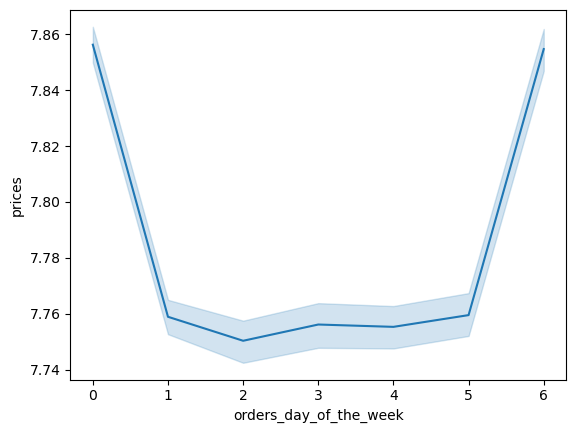

In [78]:
# create line chart

line = sns.lineplot(data = df_2, x = 'orders_day_of_the_week',y = 'prices')